# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

# Computing Historical Volatility

In this notebook, we will be computing the 20 trading days (or 1 month) Historical Volatility for the time period starting from 1st January, 2016 to 1st January, 2017. Historical Volatility gauges the fluctuations of underlying securities by measuring the price changes over a predetermined period of time in the past.

## Import the libraries
First we will import the necessary libraries. We will be importing data function from pandas_datareader with an alias 'dr'.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as dr

## Start and end date for the data
Here, we will specify the start and the end date of the data to be fetched. We are using data starting from 1st January, 2016 to 1st January 2017.

In [3]:
start_date ='2016-1-1'
end_date ='2017-1-1'

## Stock data 
We will now fetch the stock data for Apple ('AAPL') by using the get_data_google function from pandas_datareader library by specifying the start and end dates that we have defined previously. We will be saving the data in the dataframe 'data'. We will then, print the data to visualize it by using the head() function which prints the top 5 rows of the dataset.

In [4]:
data = dr.get_data_google('AAPL', start=start_date, end=end_date)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-18,118.18,118.21,117.45,117.47,24553478
2016-10-19,117.25,117.76,113.80,117.12,20034594
2016-10-20,116.86,117.38,116.33,117.06,24125801
2016-10-21,116.81,116.91,116.28,116.60,23192665
2016-10-24,117.10,117.74,117.00,117.65,23538673


## Computing Log Returns

Now we will compute the daily log returns by using the shift() function for Closing prices of the security. We make use of the numpy library for computing log of today's closing price divided by yesterday's closing price. The log returns are stored in the dataframe data under the column header 'Log Returns'.

In [5]:
data['Log Returns'] = np.log(data['Close']/data['Close'].shift(1))

## Computing Historical Volatility

The one month (or 20 trading days) historical volatility will be computed by using the rolling_std(data['Log Returns'], window=20, center=False) function which computes the rolling standard deviation of data['Log Returns'] for a period of 20 trading days. The standard deviation is multiplied by 100 to compute the percentage value for volatility. The historical volatility will be stored in the dataframe under the column header '20 day Historical Volatility'. 

In [10]:
data['20 day Historical Volatility'] = 100*pd.rolling_std(data['Log Returns'],20)

C:\Users\academy\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  if __name__ == '__main__':


## Plot the volatility
We will now plot the historical volatilty to visualise how it changes over the period of one year.

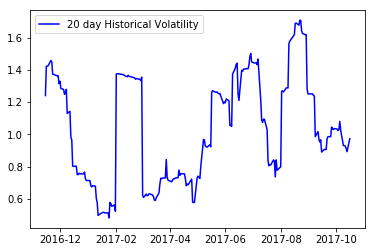

In [9]:
plt.plot(data['20 day Historical Volatility'], color = 'b', label ='20 day Historical Volatility')
plt.legend(loc='best')
plt.show()